In [1]:
import networkx.generators.small
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
g = networkx.generators.small.krackhardt_kite_graph()

In [206]:
g.number_of_nodes()

10

In [207]:
g.number_of_nodes()

10

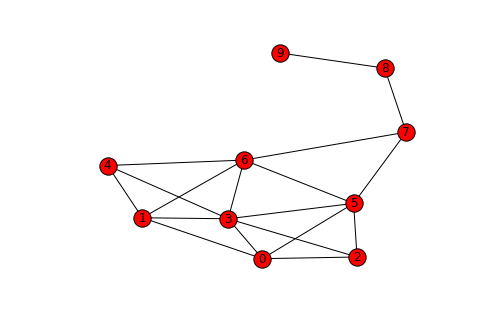

In [208]:
nx.draw(g, with_labels=True)

In [6]:
g.adjacency_list()

[[1, 2, 3, 5],
 [0, 3, 4, 6],
 [0, 3, 5],
 [0, 1, 2, 4, 5, 6],
 [1, 3, 6],
 [0, 2, 3, 6, 7],
 [1, 3, 4, 5, 7],
 [8, 5, 6],
 [9, 7],
 [8]]

In [7]:
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [8]:
dict((x, g.neighbors(x)) for x in g.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [8, 5, 6],
 8: [9, 7],
 9: [8]}

In [9]:
#same as above but with dict comprehension
{x: g.neighbors(x) for x in g.nodes()}

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [8, 5, 6],
 8: [9, 7],
 9: [8]}

In [10]:
# %doctest_mode off

In [11]:
nx.generators.small.krackhardt_kite_graph?

### Traversal

In [12]:
from networkx.algorithms import traversal

In [13]:
def DFS_nodes(graph, node, visited=[]):
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited

def DFS_edges(graph, node, visited=[], edges=[]):
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            edges.append((node, neighbor))
            DFS_edges(graph, neighbor, visited, edges)
    return edges

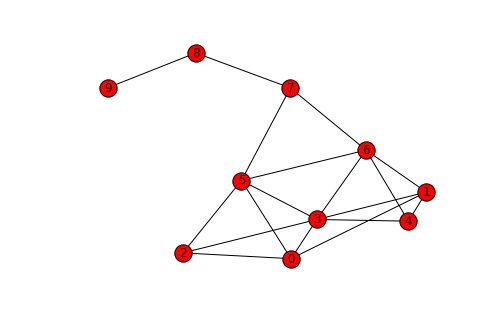

In [14]:
nx.draw(g, with_labels=True)

In [15]:
DFS_nodes(g, 1, [])

[1, 0, 2, 3, 4, 6, 5, 7, 8, 9]

In [16]:
{node: DFS_nodes(g, node, []) for node in g.nodes()}

{0: [0, 1, 3, 2, 5, 6, 4, 7, 8, 9],
 1: [1, 0, 2, 3, 4, 6, 5, 7, 8, 9],
 2: [2, 0, 1, 3, 4, 6, 5, 7, 8, 9],
 3: [3, 0, 1, 4, 6, 5, 2, 7, 8, 9],
 4: [4, 1, 0, 2, 3, 5, 6, 7, 8, 9],
 5: [5, 0, 1, 3, 2, 4, 6, 7, 8, 9],
 6: [6, 1, 0, 2, 3, 4, 5, 7, 8, 9],
 7: [7, 8, 9, 5, 0, 1, 3, 2, 4, 6],
 8: [8, 9, 7, 5, 0, 1, 3, 2, 4, 6],
 9: [9, 8, 7, 5, 0, 1, 3, 2, 4, 6]}

In [41]:
{node: DFS_edges(g, node, [], []) for node in g.nodes()}

{0: [(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)],
 1: [(1, 0), (0, 2), (2, 3), (3, 4), (4, 6), (6, 5), (5, 7), (7, 8), (8, 9)],
 2: [(2, 0), (0, 1), (1, 3), (3, 4), (4, 6), (6, 5), (5, 7), (7, 8), (8, 9)],
 3: [(3, 0), (0, 1), (1, 4), (4, 6), (6, 5), (5, 2), (5, 7), (7, 8), (8, 9)],
 4: [(4, 1), (1, 0), (0, 2), (2, 3), (3, 5), (5, 6), (6, 7), (7, 8), (8, 9)],
 5: [(5, 0), (0, 1), (1, 3), (3, 2), (3, 4), (4, 6), (6, 7), (7, 8), (8, 9)],
 6: [(6, 1), (1, 0), (0, 2), (2, 3), (3, 4), (3, 5), (5, 7), (7, 8), (8, 9)],
 7: [(7, 8), (8, 9), (7, 5), (5, 0), (0, 1), (1, 3), (3, 2), (3, 4), (4, 6)],
 8: [(8, 9), (8, 7), (7, 5), (5, 0), (0, 1), (1, 3), (3, 2), (3, 4), (4, 6)],
 9: [(9, 8), (8, 7), (7, 5), (5, 0), (0, 1), (1, 3), (3, 2), (3, 4), (4, 6)]}

In [18]:
edges = traversal.dfs_edges(g)
edges

<generator object dfs_edges at 0x0000000008F6ACA8>

In [19]:
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [20]:
edges = traversal.dfs_edges(g, source=3)
edges

<generator object dfs_edges at 0x0000000008F52678>

In [21]:
list(edges)

[(3, 0), (0, 1), (1, 4), (4, 6), (6, 5), (5, 2), (5, 7), (7, 8), (8, 9)]

In [22]:
traversal.dfs_successors(g)

{0: [1], 1: [3], 2: [5], 3: [2], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [23]:
traversal.dfs_predecessors(g, 7)

{0: 5, 1: 0, 2: 3, 3: 1, 4: 3, 5: 7, 6: 4, 8: 7, 9: 8}

In [38]:
tree = traversal.dfs_tree(g, source=0)
tree.adj

{0: {1: {}},
 1: {3: {}},
 2: {5: {}},
 3: {2: {}},
 4: {},
 5: {6: {}},
 6: {4: {}, 7: {}},
 7: {8: {}},
 8: {9: {}},
 9: {}}

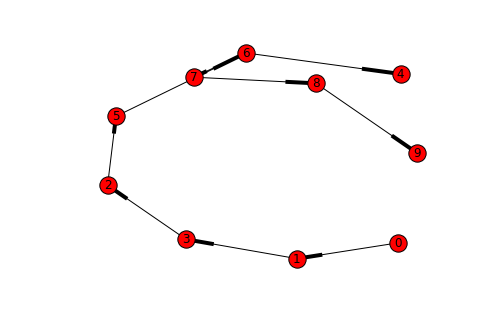

In [25]:
nx.draw(tree, with_labels=True)

In [26]:
tree.succ

{0: {1: {}},
 1: {3: {}},
 2: {5: {}},
 3: {2: {}},
 4: {},
 5: {6: {}},
 6: {4: {}, 7: {}},
 7: {8: {}},
 8: {9: {}},
 9: {}}

In [27]:
from collections import deque

In [28]:
def BFS_nodes(graph, start):
    """Returns the breath-first traversal through the graph, from start"""
    q = deque([start])
    visited = []
    while len(q) > 0:
        node = q.popleft()
        if node not in visited:
            visited.append(node)
            q.extend([neighbor for neighbor in graph[node] 
                      if neighbor not in visited])
    return visited

In [29]:
def DFS_nodes_stack (graph, start):
    """Returns the breath-first traversal through the graph, from start"""
    q = deque([start])
    visited = []
    while len(q) > 0:
        node = q.pop()
        if node not in visited:
            visited.append(node)
            q.extend(reversed([neighbor for neighbor in graph[node] \
                      if neighbor not in visited])) 
    return visited

In [30]:
node = 0
graph = g
[neighbor for neighbor in graph[node]]

# It's necessary to do reversed([...]) in the function above. Otherwise, 
# it will go first to the last of the neighbors of a node, instead of the first.
# It'd to DFS as well, but would do it starting "from the right", intead of the 
# most logical way, starting "from the left"

[1, 2, 3, 5]

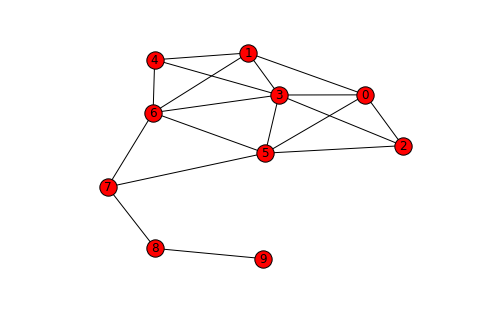

In [44]:
nx.draw(g, with_labels=True)

In [32]:
start_node = 7

print("BFS: ", BFS_nodes(g, start=start_node))
print("DFS with stack: ", DFS_nodes_stack(g, start=start_node))
print("DFS without st: ", DFS_nodes(g, node=start_node, visited=[]))

BFS:  [7, 8, 5, 6, 9, 0, 2, 3, 1, 4]
DFS with stack:  [7, 8, 9, 5, 0, 1, 3, 2, 4, 6]
DFS without st:  [7, 8, 9, 5, 0, 1, 3, 2, 4, 6]


#### BFS with NetworkX

In [33]:
edges = traversal.bfs_edges(g, start_node)
list(edges)

[(7, 8), (7, 5), (7, 6), (8, 9), (5, 0), (5, 2), (5, 3), (6, 1), (6, 4)]

In [60]:
tree = traversal.bfs_tree(g, start_node)
tree.adj

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {0: {}, 2: {}, 3: {}},
 6: {1: {}, 4: {}},
 7: {5: {}, 6: {}, 8: {}},
 8: {9: {}},
 9: {}}

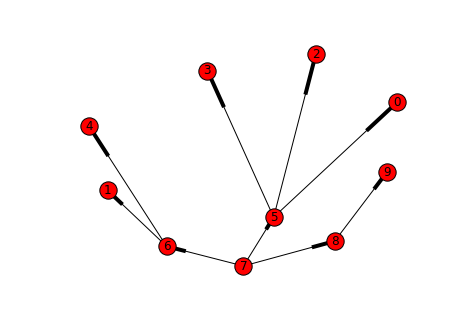

In [63]:
nx.draw(tree, with_labels=True)

In [66]:
traversal.bfs_successors(g, start_node)

{5: [0, 2, 3], 6: [1, 4], 7: [8, 5, 6], 8: [9]}

In [67]:
traversal.dfs_successors(g, start_node)

{0: [1], 1: [3], 3: [2, 4], 4: [6], 5: [0], 7: [8, 5], 8: [9]}

### Paths and walks

In [68]:
from networkx import algorithms

In [69]:
algorithms.shortest_path(g, 0, 5)

[0, 5]

In [70]:
algorithms.shortest_path(g, 0, 7)

[0, 5, 7]

In [75]:
algorithms.average_shortest_path_length(g)

1.9777777777777779

In [79]:
# shortest paths in a graph, from a starting node

algorithms.all_pairs_shortest_path(g)[7]

{0: [7, 5, 0],
 1: [7, 6, 1],
 2: [7, 5, 2],
 3: [7, 5, 3],
 4: [7, 6, 4],
 5: [7, 5],
 6: [7, 6],
 7: [7],
 8: [7, 8],
 9: [7, 8, 9]}

### Dijkstra's Algorithm

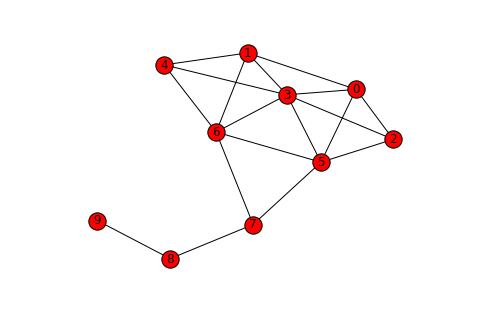

In [82]:
nx.draw(g, with_labels=True)

In [80]:
algorithms.dijkstra_path(g, 1, 5)

[1, 0, 5]

In [81]:
algorithms.dijkstra_predecessor_and_distance(g, 1, 5)

({0: [1],
  1: [],
  2: [0, 3],
  3: [1],
  4: [1],
  5: [0, 3, 6],
  6: [1],
  7: [6],
  8: [7],
  9: [8]},
 {0: 1, 1: 0, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 3, 9: 4})

In [83]:
import itertools
g.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [165]:
pairs = list(itertools.combinations(g.nodes(), 2))
pairs[:4]

[(0, 1), (0, 2), (0, 3), (0, 4)]

In [147]:
for pair in pairs[:10]:
    print (algorithms.shortest_path(g, *pair),
           algorithms.dijkstra_path(g, *pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[0, 5, 7, 8] [0, 5, 7, 8]
[0, 5, 7, 8, 9] [0, 5, 7, 8, 9]
[1, 0, 2] [1, 0, 2]


In [129]:
from random import choice
import numpy as np

In [137]:
%%timeit
choice(range(10))

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.3 µs per loop


In [138]:
%%timeit
np.random.randint(10)

The slowest run took 8.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.33 µs per loop


In [162]:
new_edges = [x + (choice(range(10)),) for x in pairs]
new_edges[:10]

[(0, 1, 5),
 (0, 2, 0),
 (0, 3, 6),
 (0, 4, 0),
 (0, 5, 3),
 (0, 6, 0),
 (0, 7, 0),
 (0, 8, 0),
 (0, 9, 2),
 (1, 2, 0)]

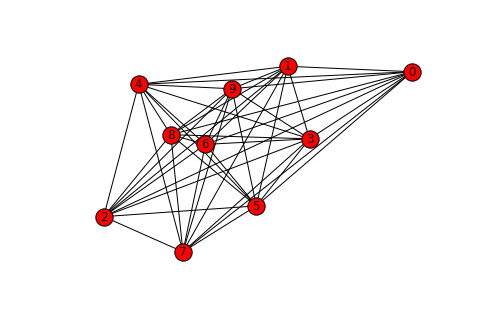

In [211]:
gg = g.copy()
gg.clear()
gg.add_weighted_edges_from(new_edges)
nx.draw(gg, with_labels=True)

In [215]:
for pair in pairs:
    print (algorithms.shortest_path(gg, *pair),
           algorithms.dijkstra_path(gg, *pair))

[0, 1] [0, 2, 1]
[0, 2] [0, 2]
[0, 3] [0, 2, 3]
[0, 4] [0, 4]
[0, 5] [0, 4, 5]
[0, 6] [0, 6]
[0, 7] [0, 7]
[0, 8] [0, 8]
[0, 9] [0, 9]
[1, 2] [1, 2]
[1, 3] [1, 2, 3]
[1, 4] [1, 4]
[1, 5] [1, 4, 5]
[1, 6] [1, 2, 0, 6]
[1, 7] [1, 2, 0, 7]
[1, 8] [1, 2, 0, 8]
[1, 9] [1, 2, 0, 9]
[2, 3] [2, 3]
[2, 4] [2, 0, 4]
[2, 5] [2, 0, 4, 5]
[2, 6] [2, 0, 6]
[2, 7] [2, 0, 7]
[2, 8] [2, 0, 8]
[2, 9] [2, 0, 9]
[3, 4] [3, 2, 0, 4]
[3, 5] [3, 2, 0, 4, 5]
[3, 6] [3, 2, 0, 6]
[3, 7] [3, 2, 0, 7]
[3, 8] [3, 2, 0, 8]
[3, 9] [3, 2, 0, 9]
[4, 5] [4, 5]
[4, 6] [4, 0, 6]
[4, 7] [4, 0, 7]
[4, 8] [4, 0, 8]
[4, 9] [4, 0, 9]
[5, 6] [5, 4, 0, 6]
[5, 7] [5, 4, 0, 7]
[5, 8] [5, 4, 0, 8]
[5, 9] [5, 4, 0, 9]
[6, 7] [6, 0, 7]
[6, 8] [6, 0, 8]
[6, 9] [6, 0, 9]
[7, 8] [7, 0, 8]
[7, 9] [7, 0, 9]
[8, 9] [8, 0, 9]
